In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics ,linear_model as lir, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/My Drive/processed_data/final.csv")
data.head()

Mounted at /content/drive


,0,1,2,3,4,5,6,7,8,9,is_churn
0,0.628673,-0.062653,-0.182833,0.264305,0.238114,0.053275,0.065127,-0.032926,0.289713,0.010577,1
1,0.708583,-0.451231,0.731810,-0.325409,0.029277,0.157258,-0.413314,-0.081948,-0.378832,0.067124,1
2,0.914509,0.012337,1.074347,0.237393,-0.278264,0.190097,0.168211,0.044930,0.093576,-0.102084,1
3,-0.323182,0.114473,0.120561,-0.025698,-0.185904,0.195808,0.614533,-0.071374,-0.036722,0.938720,1
4,0.225305,0.239037,-0.357108,-0.140872,-0.498801,0.220262,0.406497,-0.080835,-0.100077,0.968652,1


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:10],data['is_churn'], test_size=0.3,random_state = 20)

list_of_modals_and_accuracy = {}

Heat map


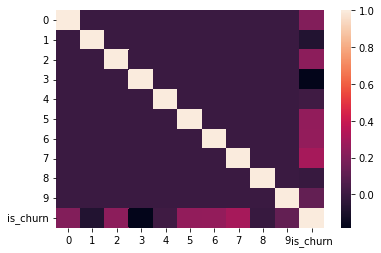

In [ ]:

seaborn.heatmap(data.corr())
print("Heat map")


confusion_matrix : 

 [[261805   3321]
 [ 14988  11174]]

Accuracy is :  0.9371446815522781

Classification Report
               precision    recall  f1-score   support

           0       0.95      0.99      0.97    265126
           1       0.77      0.43      0.55     26162

    accuracy                           0.94    291288
   macro avg       0.86      0.71      0.76    291288
weighted avg       0.93      0.94      0.93    291288



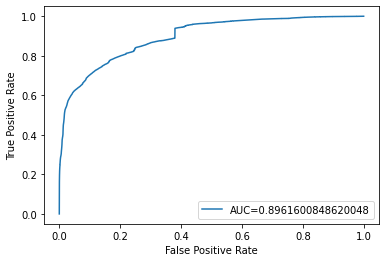

In [ ]:
model = lir.LogisticRegression()
model.fit(X_train,y_train)
y_pred  = model.predict(X_test)

results = metrics.confusion_matrix(y_test, y_pred)
print("\nconfusion_matrix : \n\n",results)
print("\nAccuracy is : ",metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report\n",metrics.classification_report(y_test, y_pred))


list_of_modals_and_accuracy["Logistic Regression"] = metrics.accuracy_score(y_test, y_pred)
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr1,tpr1,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


confusion_matrix : 

 [[246393  18733]
 [ 11120  15042]]

Accuracy is :  0.8975138007744913

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.93      0.94    265126
           1       0.45      0.57      0.50     26162

    accuracy                           0.90    291288
   macro avg       0.70      0.75      0.72    291288
weighted avg       0.91      0.90      0.90    291288



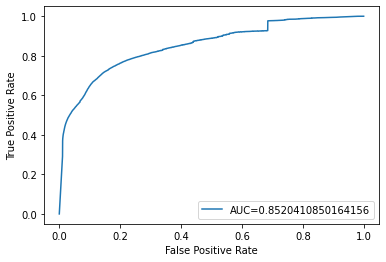

In [ ]:
nv = GaussianNB() 
nv.fit(X_train,y_train) 
y_pred = nv.predict(X_test) 

results = metrics.confusion_matrix(y_test, y_pred)
print("\nconfusion_matrix : \n\n",results)
print("\nAccuracy is : ",metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report\n",metrics.classification_report(y_test, y_pred))


list_of_modals_and_accuracy["Naïve bayes"] = metrics.accuracy_score(y_test, y_pred)

y_pred_proba = nv.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr2,tpr2,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
modal = svm.SVC(kernel = "linear",probability=True)
modal.fit(X_train, y_train)
y_pred = modal.predict(X_test)

results = metrics.confusion_matrix(y_test, y_pred)
print("\nconfusion_matrix : \n\n",results)
print("\nAccuracy is : ",metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report\n",metrics.classification_report(y_test, y_pred))

list_of_modals_and_accuracy["Support Vector machine"] = metrics.accuracy_score(y_test, y_pred)

y_pred_proba = modal.predict_proba(X_test)[:,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr3,tpr3,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


confusion_matrix : 

 [[261496   3630]
 [  7616  18546]]

Accuracy is :  0.9613921617093736

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    265126
           1       0.84      0.71      0.77     26162

    accuracy                           0.96    291288
   macro avg       0.90      0.85      0.87    291288
weighted avg       0.96      0.96      0.96    291288



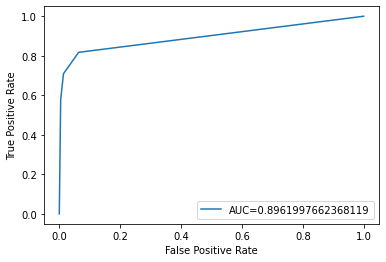

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

results = metrics.confusion_matrix(y_test, y_pred)
print("\nconfusion_matrix : \n\n",results)
print("\nAccuracy is : ",metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report\n",metrics.classification_report(y_test, y_pred))

list_of_modals_and_accuracy["KNN"] = metrics.accuracy_score(y_test, y_pred)


y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)



plt.plot(fpr3,tpr3,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

[0 0 0 ... 0 0 0]

confusion_matrix : 

 [[262605   2521]
 [  5697  20465]]

Accuracy is :  0.9717873719480377

Classification Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98    265126
           1       0.89      0.78      0.83     26162

    accuracy                           0.97    291288
   macro avg       0.93      0.89      0.91    291288
weighted avg       0.97      0.97      0.97    291288



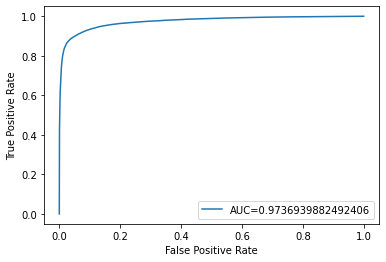

In [ ]:
model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
y_pred = np.where(y_pred > 0.5, 1, 0)

results = metrics.confusion_matrix(y_test, y_pred)
print("\nconfusion_matrix : \n\n",results)
print("\nAccuracy is : ",metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report\n",metrics.classification_report(y_test, y_pred))

list_of_modals_and_accuracy["Random forest"] = metrics.accuracy_score(y_test, y_pred)


y_pred_proba = model.predict_proba(X_test)[:,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr4,tpr4,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
print("The Modal with Highest Accuracy :",max(list_of_modals_and_accuracy,key = lambda a:list_of_modals_and_accuracy[a]),"With Accuracy of",list_of_modals_and_accuracy[max(list_of_modals_and_accuracy,key = lambda a:list_of_modals_and_accuracy[a])])

The Modal with Highest Accuracy : Random forest With Accuracy of 0.9717873719480377


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e50defa50>,
      dtype=object)

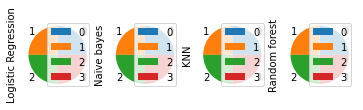

In [ ]:
df = pd.DataFrame(list_of_modals_and_accuracy,index=[i for i in range(len(list_of_modals_and_accuracy))])
df.plot.pie(subplots=True)


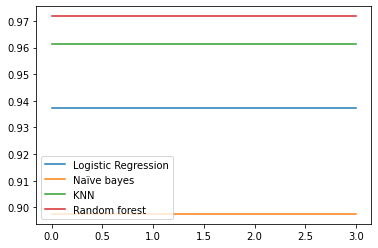

In [ ]:
df.plot()

In [ ]:
#seaborn.boxplot(data = data)

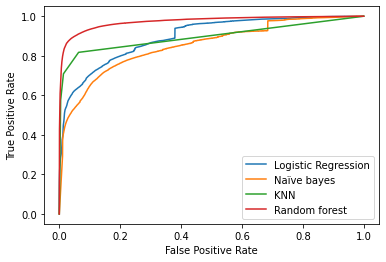

In [ ]:
plt.plot(fpr1,tpr1,label="Logistic Regression")
plt.plot(fpr2,tpr2,label="Naïve bayes")
plt.plot(fpr3,tpr3,label="KNN")
plt.plot(fpr4,tpr4,label="Random forest")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()